# Machine Learning | Multi-Class Classification Project

In [36]:
# Imports
import pandas as pd
import sqlite3 as db
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [ ]:
# Connection to sqlite
cnx = db.connect('../data/data.sqlite')

# Loading datasets into pandas dataframes
df_train = pd.read_sql_query("SELECT * FROM train", cnx)
df_unseen = pd.read_sql_query("SELECT * FROM test", cnx)

### Data Exploration

In [38]:
# Looking at top 5 rows of the train dataset
df_train.head()

,index,System,Science,Method,People,Estate,Tennis,Problem,Buyer,Insect,...,Moment,Driver,Session,Guitar,Shopping,Trainer,Office,Country,Tension,class
0,0,-12.277367,-2.125027,-1.264999,0.854478,2.705232,-92.590128,68.860620,11.426538,-1.215241,...,-34.114437,-83.875566,0,UKBF,-18.883847,220,NaN,51.844775,25.933900,2
1,1,-15.915018,-6.179856,-5.546974,0.685782,-5.639822,-41.829855,112.661676,-5.022515,-286.623875,...,-8046.151876,31.033599,0,SCXP,50.945979,-441,NaN,96.531426,-38.254764,2
2,2,-14.271594,7.301318,11.250151,1.162530,3.394609,-17.046542,102.944428,11.558543,-0.047253,...,-1.326493,17.453811,1,ITVQ,22.305993,-156,NaN,27.276191,2.785682,2
3,3,8.457836,4.288695,-1.506822,1.612383,0.133044,-26.997285,45.890959,1.902642,-0.701772,...,-19.700260,-28.635840,1,ITVQ,36.155249,202,-0.065895,-113.871227,57.827242,1
4,4,-3.065723,-0.328456,7.612236,1.585490,1.161368,9.162676,-23.006553,-3.355169,-0.107726,...,-3.024095,-4.793964,0,JGMQ,-54.292301,-496,NaN,37.558166,34.614522,2


In [39]:
# Looking at the top 5 rows of the unseen dataset
df_unseen.head()

,index,System,Science,Method,People,Estate,Tennis,Problem,Buyer,Insect,...,Moment,Driver,Session,Guitar,Shopping,Trainer,Office,Country,Tension,class
0,5000,5.044612,0.047192,-14.515989,0.319054,-0.699865,-21.124734,-225.270970,-19.876124,1.497332,...,42.033336,-15.006573,1,SCXP,68.924775,-496,-4.857052,-34.576942,7.612997,None
1,5001,10.414225,0.925420,8.303170,5.834652,-1.509261,-9.116291,-41.988802,2.849018,-1.694456,...,-47.567033,43.301643,0,WDCK,-42.959845,-497,1.521152,-22.644998,0.503049,None
2,5002,-32.739010,2.798970,-8.513003,3.790751,-1.323075,3.516482,14.081416,3.708836,-3.737995,...,-104.933587,-84.931861,0,WDCK,-181.931153,-812,-1.766613,-62.649064,-15.453559,None
3,5003,-5.069695,-0.454917,-9.447911,5.657400,-2.554566,40.380708,-76.240047,-7.154376,1.233867,...,34.637304,47.315606,0,UKBF,31.680505,-393,-1.019960,-52.758331,-32.092616,None
4,5004,8.112611,3.815232,-17.485769,4.070687,-3.989204,-13.275574,-60.056923,1.257805,2.609017,...,73.240751,-65.030175,0,WDCK,-40.582090,388,5.208271,-227.397254,-6.118741,None


In [40]:
# Looking at the info for the train dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      5000 non-null   int64  
 1   System     5000 non-null   float64
 2   Science    5000 non-null   float64
 3   Method     5000 non-null   float64
 4   People     5000 non-null   float64
 5   Estate     5000 non-null   float64
 6   Tennis     4950 non-null   float64
 7   Problem    5000 non-null   float64
 8   Buyer      5000 non-null   float64
 9   Insect     5000 non-null   float64
 10  Music      5000 non-null   object 
 11  Guidance   5000 non-null   float64
 12  Power      5000 non-null   float64
 13  Knowledge  5000 non-null   int64  
 14  Owner      5000 non-null   int64  
 15  Oven       3882 non-null   float64
 16  Storage    5000 non-null   object 
 17  Resource   5000 non-null   float64
 18  Writer     5000 non-null   float64
 19  Member     5000 non-null   float64
 20  Cookie  

In [41]:
# Looking at the info for the unseen dataset
df_unseen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      500 non-null    int64  
 1   System     500 non-null    float64
 2   Science    500 non-null    float64
 3   Method     500 non-null    float64
 4   People     500 non-null    float64
 5   Estate     500 non-null    float64
 6   Tennis     500 non-null    float64
 7   Problem    500 non-null    float64
 8   Buyer      500 non-null    float64
 9   Insect     500 non-null    float64
 10  Music      500 non-null    object 
 11  Guidance   500 non-null    float64
 12  Power      500 non-null    float64
 13  Knowledge  500 non-null    int64  
 14  Owner      500 non-null    int64  
 15  Oven       500 non-null    float64
 16  Storage    500 non-null    object 
 17  Resource   500 non-null    float64
 18  Writer     500 non-null    float64
 19  Member     500 non-null    float64
 20  Cookie    

The unseen dataset already can a class column with all empty rows which we need to predict. Therefore we should drop this column, when running it through our classifier.

We will now focus on the train dataset

In [42]:
df_train.describe()

,index,System,Science,Method,People,Estate,Tennis,Problem,Buyer,Insect,...,Virus,Moment,Driver,Session,Shopping,Trainer,Office,Country,Tension,class
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4950.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,1992.000000,5000.000000,5000.000000,5000.000000
mean,2499.500000,3.626589,-0.200416,-2.183269,3.368851,-0.018640,-15.101663,14.866064,2.400767,-0.852966,...,0.620706,-23.944606,0.220428,0.507000,-0.994021,-2.712600,0.004286,0.105429,0.516781,1.390200
std,1443.520003,21.065750,4.251185,12.623537,1.940520,2.772808,34.182057,81.075291,9.627286,26.960794,...,3.385152,756.847784,53.170916,0.500001,62.490978,415.315616,2.239891,98.484851,45.649761,0.666058
min,0.000000,-86.155943,-14.668196,-42.371814,0.001222,-11.278285,-135.558524,-315.530250,-30.200623,-680.429490,...,-13.174394,-19101.126887,-199.363999,0.000000,-225.192995,-1384.000000,-8.314120,-318.860017,-162.342203,0.000000
25%,1249.750000,-10.474370,-3.093249,-11.145639,1.703760,-1.827719,-37.704039,-39.701486,-4.438753,-2.053086,...,-1.657664,-57.634569,-34.532060,0.000000,-42.853643,-285.250000,-1.478791,-65.329902,-30.230250,1.000000
50%,2499.500000,4.130533,-0.159076,-2.493639,3.369625,0.087766,-15.420876,15.547347,1.962666,-0.624693,...,0.649151,-17.536472,0.186284,1.000000,-0.374828,-4.000000,0.001948,1.142042,0.707517,1.000000
75%,3749.250000,18.201192,2.808483,6.491201,5.051381,1.885154,7.662489,69.221814,8.940031,0.871441,...,2.890232,24.463230,35.744003,1.000000,40.900158,277.000000,1.518297,65.544375,31.348482,2.000000
max,4999.000000,79.522878,12.536525,45.130450,6.722135,10.174718,129.547561,284.982328,38.678186,823.816883,...,11.898921,23126.321028,213.945884,1.000000,207.901162,1498.000000,8.979794,346.422286,219.393845,2.000000


In [43]:
# Identifying missing values in df_train
missing_values = df_train.isnull().sum()

# Percentage of missing values
missing_percentage = (df_train.isnull().sum() / len(df_train)) * 100

# Display both count and percentage of missing values
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

print(missing_data)


           Missing Values  Percentage
index                   0        0.00
System                  0        0.00
Science                 0        0.00
Method                  0        0.00
People                  0        0.00
Estate                  0        0.00
Tennis                 50        1.00
Problem                 0        0.00
Buyer                   0        0.00
Insect                  0        0.00
Music                   0        0.00
Guidance                0        0.00
Power                   0        0.00
Knowledge               0        0.00
Owner                   0        0.00
Oven                 1118       22.36
Storage                 0        0.00
Resource                0        0.00
Writer                  0        0.00
Member                  0        0.00
Cookie                  0        0.00
Virus                   0        0.00
Moment                  0        0.00
Driver                  0        0.00
Session                 0        0.00
Guitar      

In [44]:
# Identifying missing values in df_unseen
missing_values = df_unseen.isnull().sum()

# Percentage of missing values
missing_percentage = (df_unseen.isnull().sum() / len(df_unseen)) * 100

# Display both count and percentage of missing values
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

print(missing_data)


           Missing Values  Percentage
index                   0         0.0
System                  0         0.0
Science                 0         0.0
Method                  0         0.0
People                  0         0.0
Estate                  0         0.0
Tennis                  0         0.0
Problem                 0         0.0
Buyer                   0         0.0
Insect                  0         0.0
Music                   0         0.0
Guidance                0         0.0
Power                   0         0.0
Knowledge               0         0.0
Owner                   0         0.0
Oven                    0         0.0
Storage                 0         0.0
Resource                0         0.0
Writer                  0         0.0
Member                  0         0.0
Cookie                  0         0.0
Virus                   0         0.0
Moment                  0         0.0
Driver                  0         0.0
Session                 0         0.0
Guitar      

In [45]:
# Check for duplicate entries 
print(f"Duplicate Rows: {df_train.duplicated().sum()}")

Duplicate Rows: 0


In [46]:
# Check for duplicate features
print(f"Duplicate Features: {df_train.T.duplicated().sum()}")

Duplicate Features: 0


In [47]:
## Checking for objects | Non-numeric values and their count
for i in df_train.select_dtypes(include="object").columns:
    print(df_train[i].value_counts())
    print("***"*10)

Music
OTJT    1467
IHEL    1299
IMIB     957
GYME     646
WCED     351
KVQK     165
QUPD      82
YPKZ      28
UQDZ       4
IGUD       1
Name: count, dtype: int64
******************************
Storage
ZFYY    2515
FUZB    2484
UZYO       1
Name: count, dtype: int64
******************************
Guitar
SCXP    860
ITVQ    836
RSNM    836
WDCK    826
UKBF    823
JGMQ    818
BWWI      1
Name: count, dtype: int64
******************************


#### Exploration of Numeric values

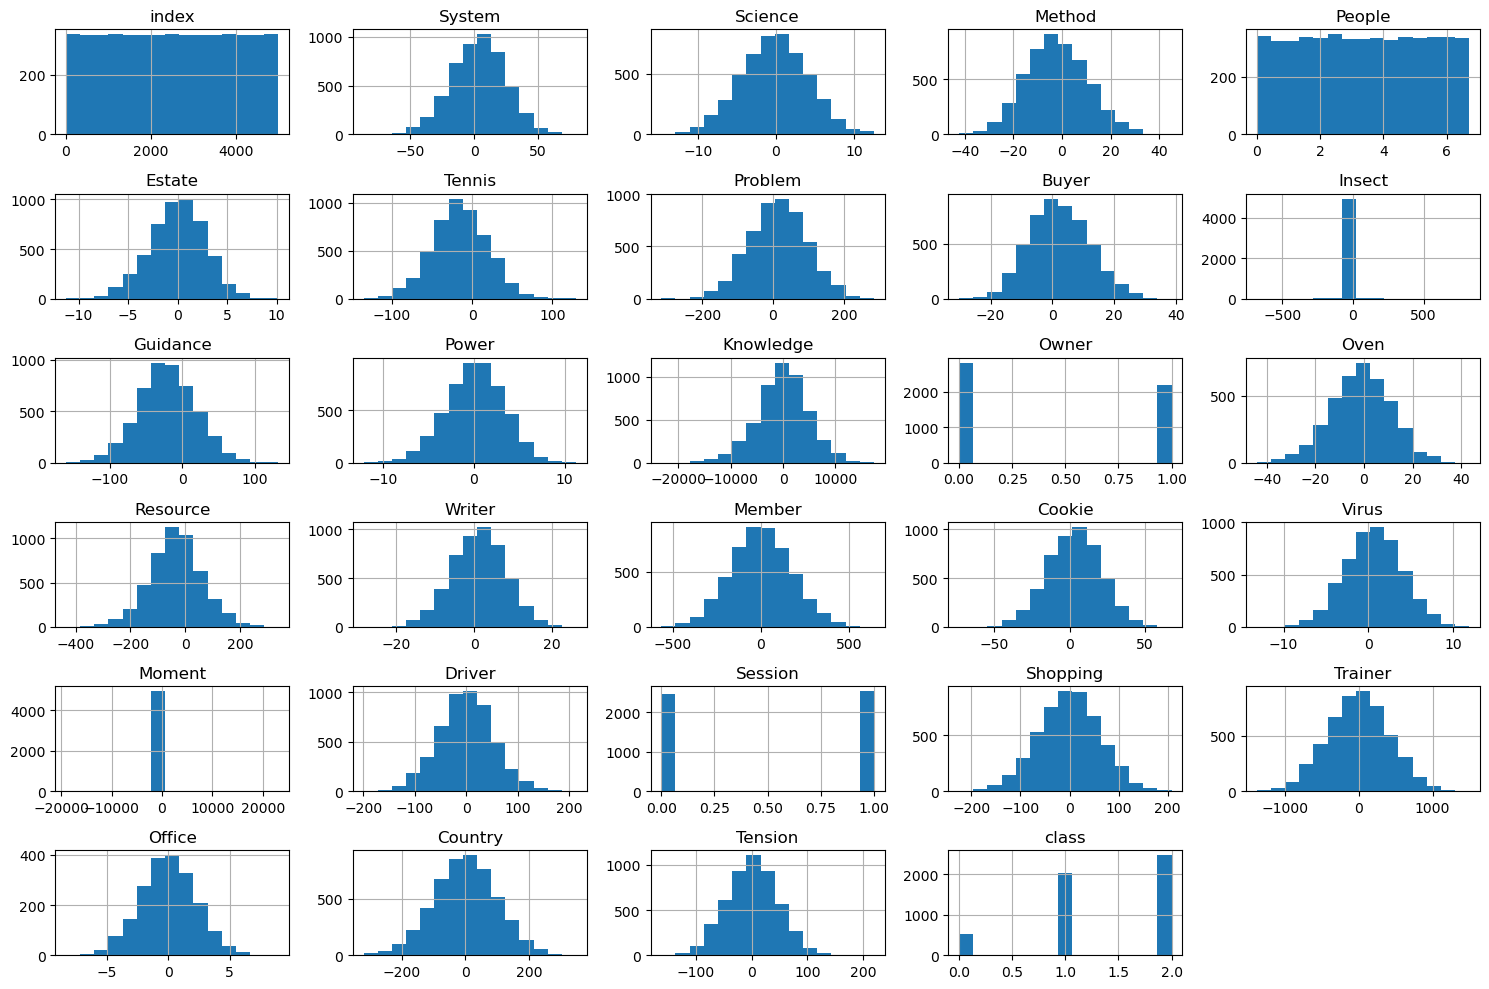

In [48]:
# Checking the distribution 

numeric_cols = df_train.select_dtypes(include='number').columns

# Plot histograms
df_train[numeric_cols].hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

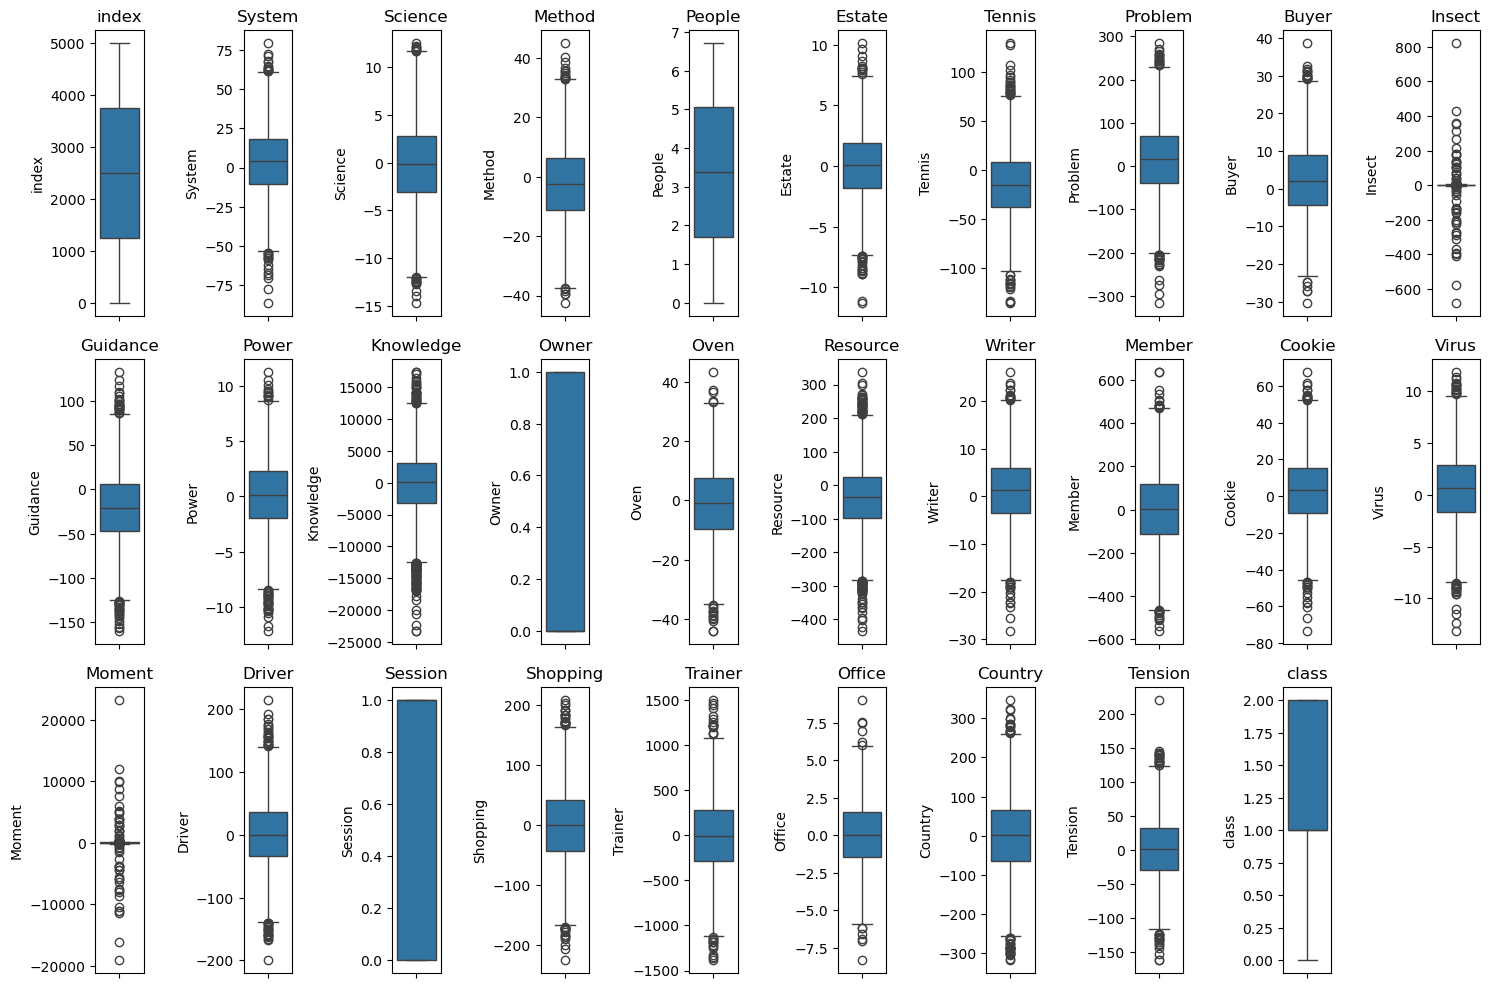

In [49]:
## Box plot to identify outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, (len(numeric_cols) + 2) // 3, i + 1)
    sns.boxplot(y=df_train[col])
    plt.title(col)
plt.tight_layout()
plt.show()


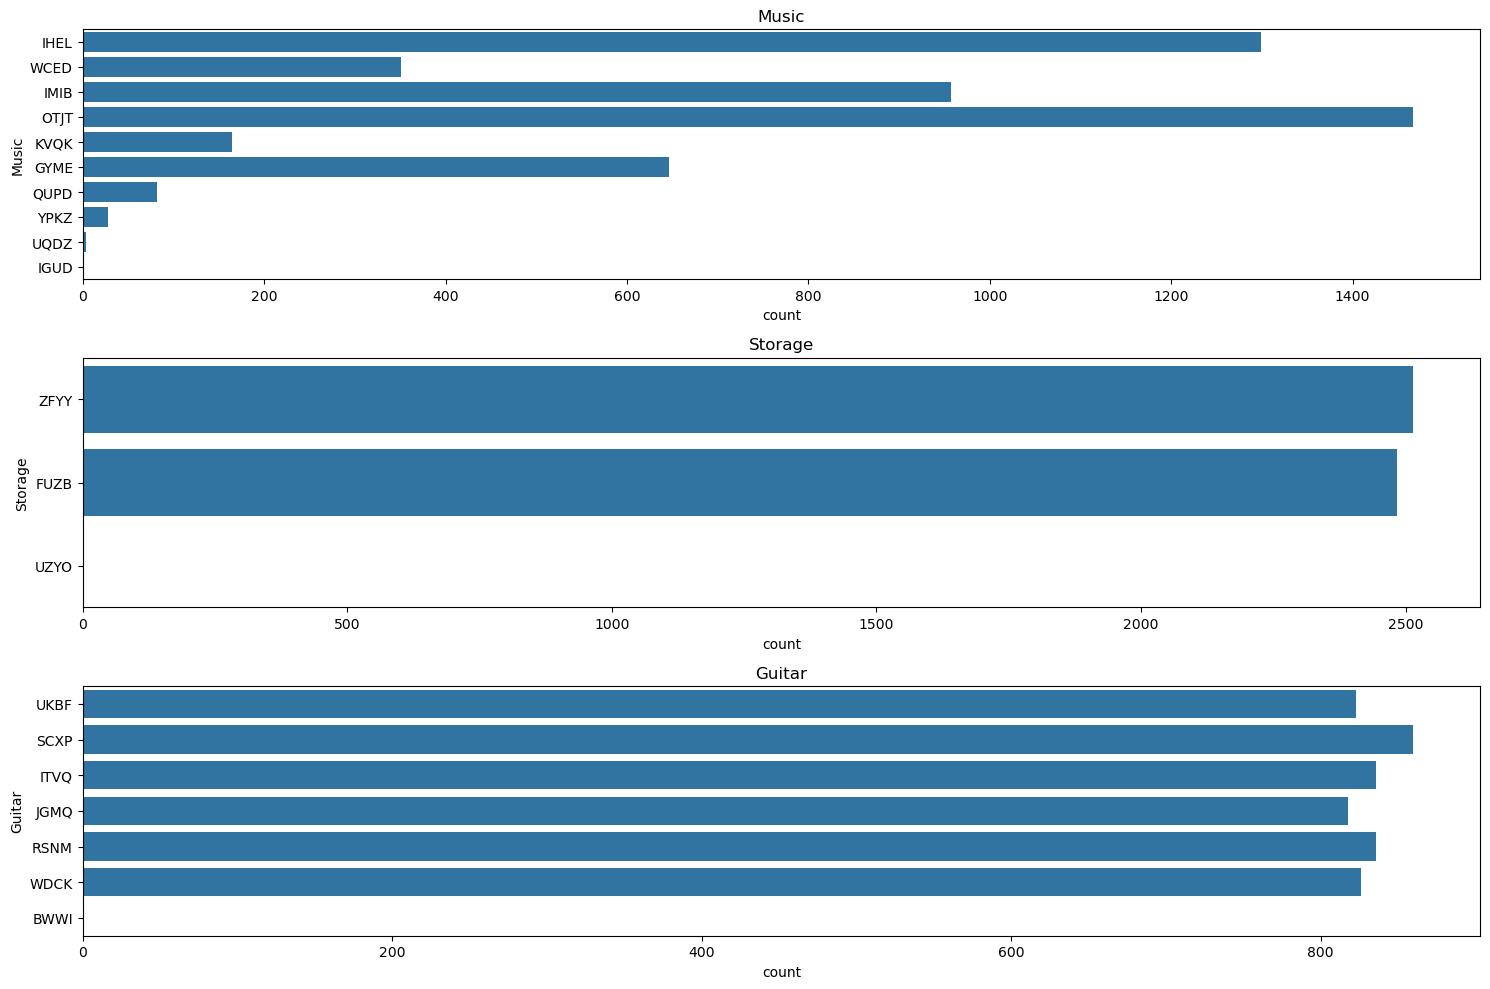

In [50]:
categorical_cols = df_train.select_dtypes(include='object').columns

# Plot count plots for categorical variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, (len(categorical_cols) + 2) // 3, i + 1)
    sns.countplot(y=df_train[col])
    plt.title(col)
plt.tight_layout()
plt.show()

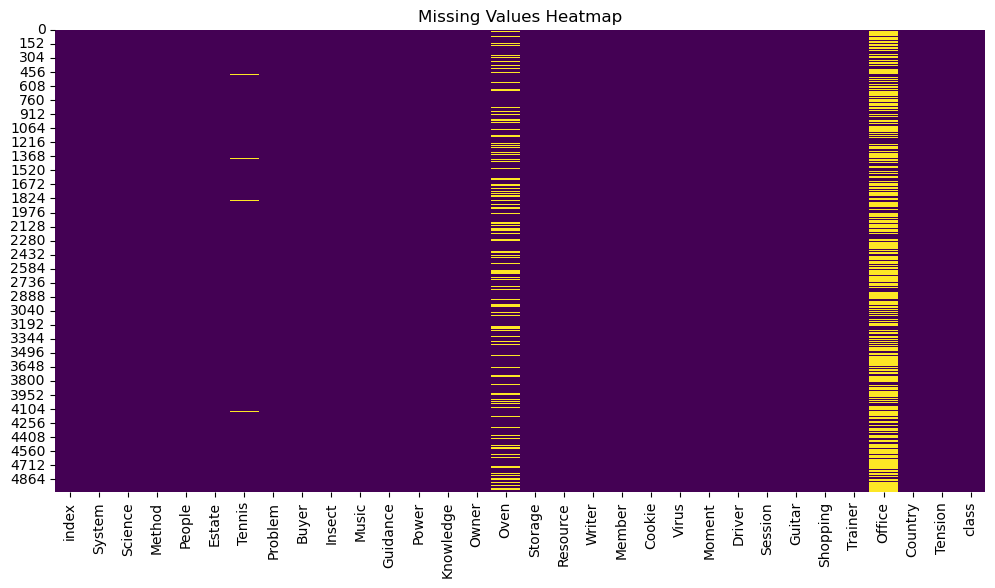

In [51]:
## Visualizing missing value
plt.figure(figsize=(12, 6))
sns.heatmap(df_train.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


<Axes: >

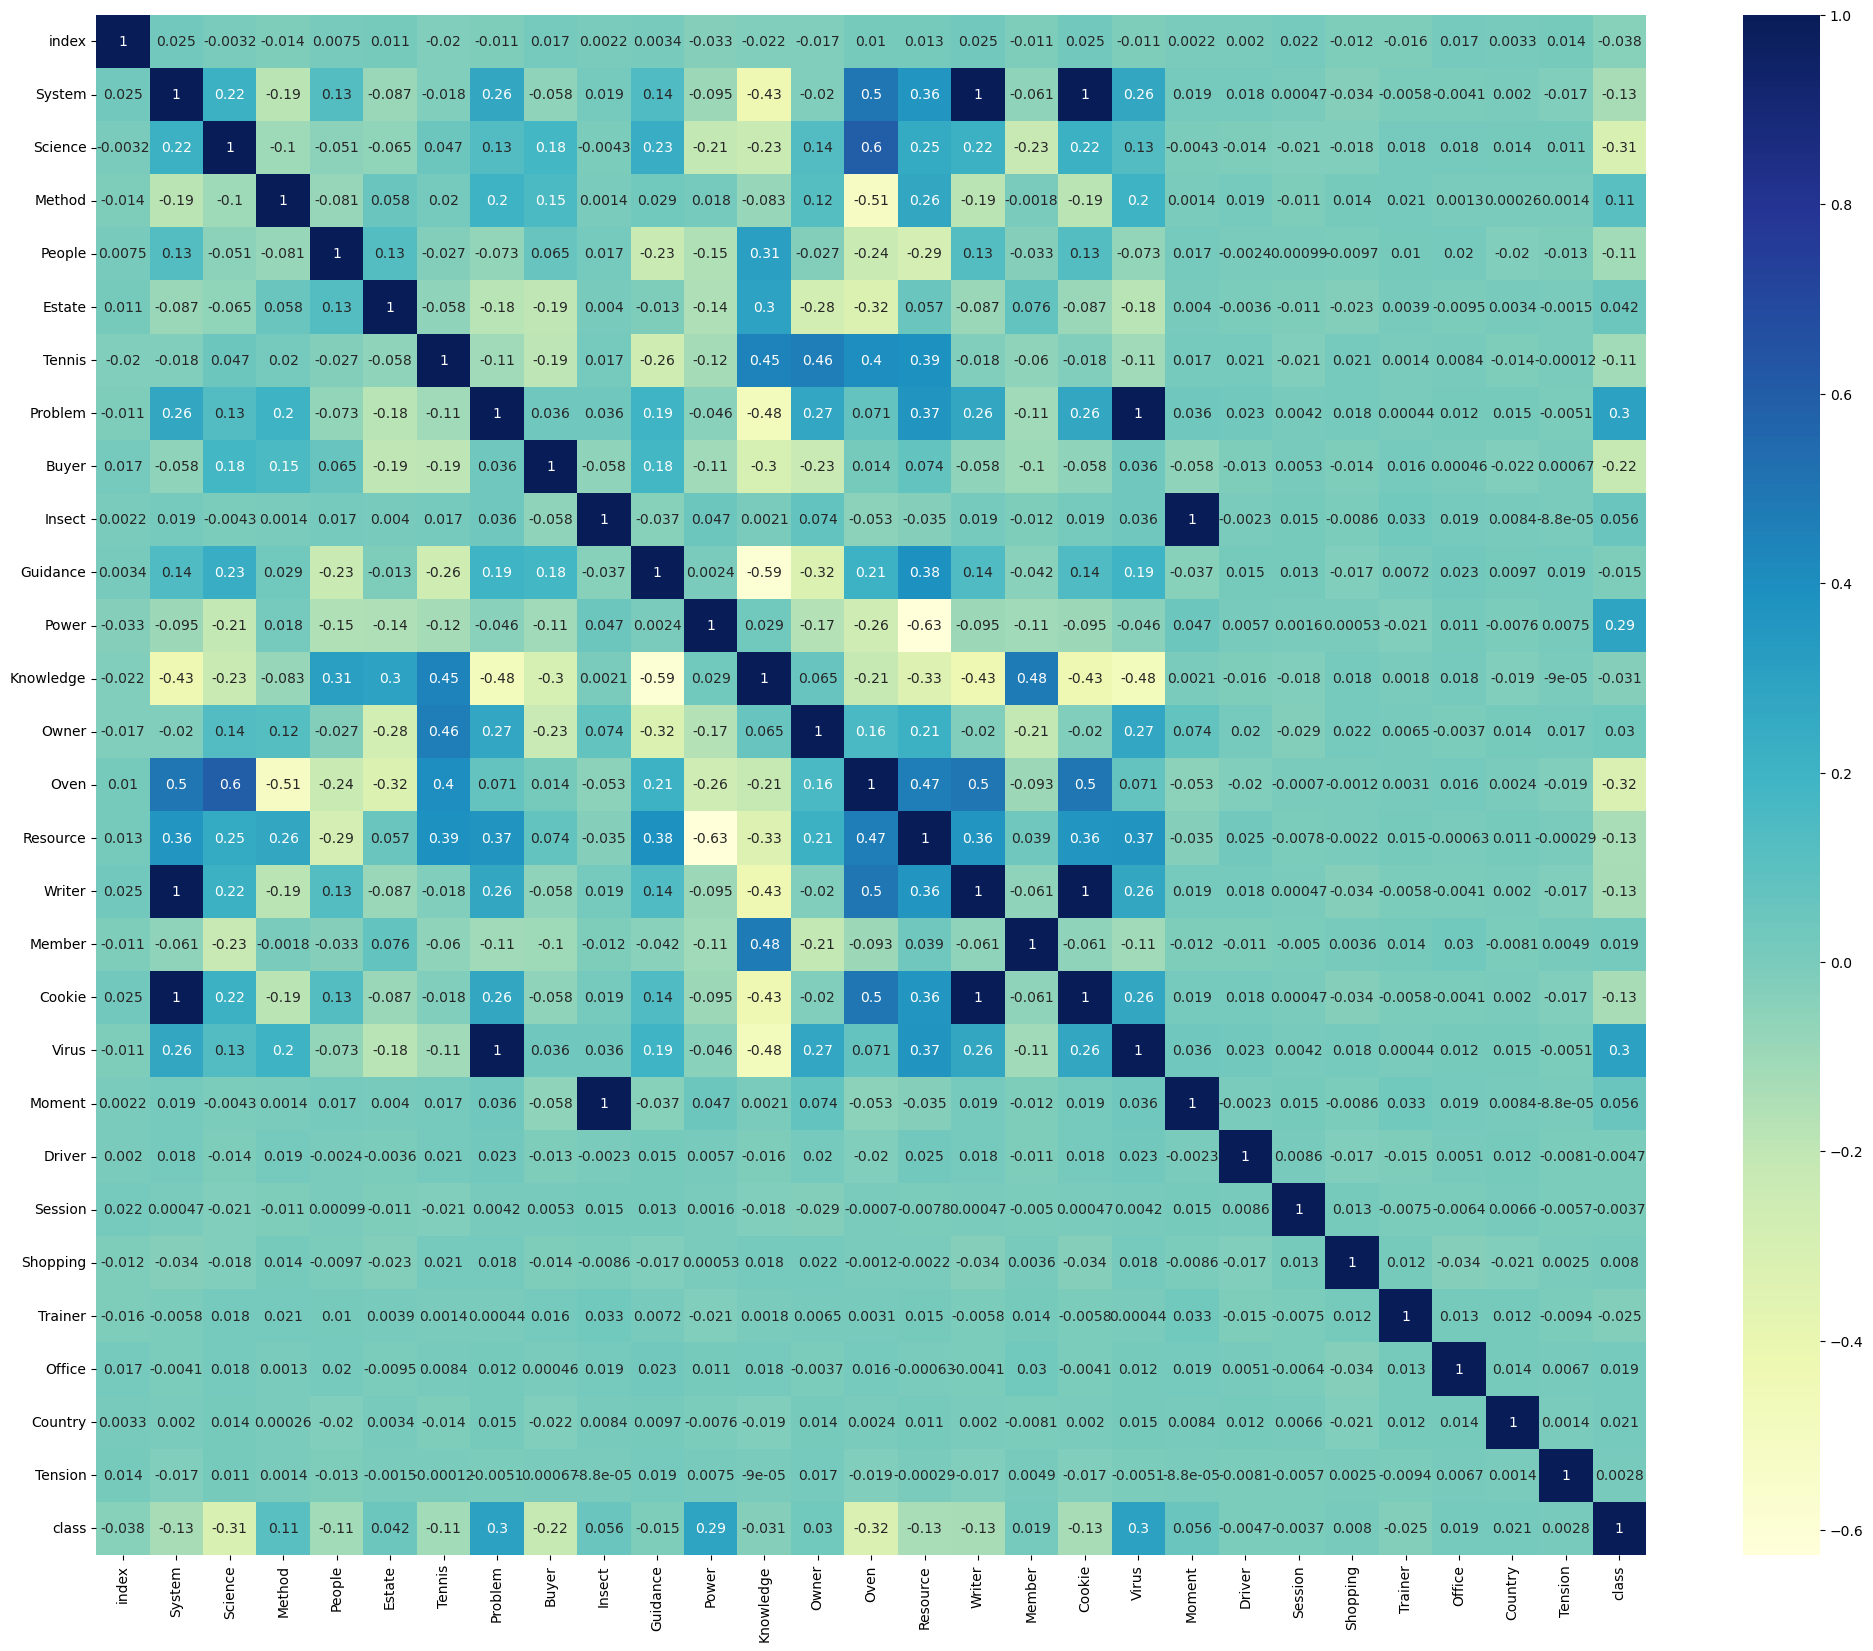

In [52]:

## Checking Feature Corelation | Pearson Correlation
df_train_numeric = df_train.drop(['Storage', 'Music', 'Guitar'], axis=1)

plt.figure(figsize=(25,20))
sns.heatmap(df_train_numeric.corr(), annot=True, cmap="YlGnBu")

### Observations

We have **31 columns** with a lot of missing values and non numeric rows.

* *Music*, *Storage*,  *Guitar* columns need to be converted into numeric form
* Columns with missing values:
  * *Tennis* = 50 rows. Can be guessed
  * *Oven* = 1118 rows.  22.36% values missing. Can be guessed
  * *Office* = 3008 rows. 60.16% values missing. Better to discard column. 
* Big spread of data on some features. | Features are skewed
  * Needs to normalised
* Some features have high correlation
  * Feature selection required
* Some features have high number of outliers
  * If accuracy is hampered, we may try using outlier analysis

### Data Preprocessing

#### Data Cleaning

In [53]:
# Drop unnecessary columns in df_train
df_train_cleaned=df_train.drop(['Office','index'], axis=1)

# Drop unnecessary columns in df_unseen (aligning with df_train_cleaned)
df_unseen_cleaned = df_unseen.drop(['Office', 'index', 'class'], axis=1)

In [54]:
# Separate features (X) and labels (y)
X = df_train_cleaned.drop(columns=['class'])  # Everything except the class column
y = df_train_cleaned['class']  # Only the class column

print("Features and labels separated.")

Features and labels separated.


In [55]:
# Train-test split | 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#### Encoding

In [56]:

# Applying one-hot encoding to the string columns on the training set
X_train_encoded = pd.get_dummies(X_train, columns=['Music', 'Storage', 'Guitar'])

# Aligning the test set with the training set encoding
X_test_encoded = pd.get_dummies(X_test, columns=['Music', 'Storage', 'Guitar'])

# Ensuring the test set has the same columns as the training set (fill missing columns with 0s)
# Columns should be the same, but this step is just for precaution
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Applying one-hot encoding to the unseen data
df_unseen_encoded = pd.get_dummies(df_unseen_cleaned, columns=['Music', 'Storage', 'Guitar'])

# Ensuring unseen data has the same columns as the training set
df_unseen_encoded = df_unseen_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

#### Imputation

In [57]:
# Imputation of missing values
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train_encoded)  # Fit on training data
X_test_imputed = imputer.transform(X_test_encoded)  # Transform test data based on training data

df_unseen_imputed = imputer.transform(df_unseen_encoded)  # Transform unseen data based on training data

In [58]:
# Checking class distribution in the training set
class_counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(class_counts[0], class_counts[1]))
print(class_distribution)

{0: 411, 1: 1617, 2: 1972}


In [59]:
# Checking class distribution in the test set
class_counts = np.unique(y_test, return_counts=True)
class_distribution = dict(zip(class_counts[0], class_counts[1]))
print(class_distribution)

{0: 103, 1: 404, 2: 493}


### Handle class imbalance on train set | Oversampling with SMOTE

In [60]:
# Applying SMOTE to handle class imbalance (only to the training set)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_imputed, y_train)

In [61]:
# Checking class distribution in the train set | After SMOTE
class_counts = np.unique(y_train_resampled, return_counts=True)
class_distribution = dict(zip(class_counts[0], class_counts[1]))
print(class_distribution)

{0: 1972, 1: 1972, 2: 1972}


In [62]:
# Checking class distribution in the test set
# To make sure it is still the same
class_counts = np.unique(y_test, return_counts=True)
class_distribution = dict(zip(class_counts[0], class_counts[1]))
print(class_distribution)

{0: 103, 1: 404, 2: 493}


### Feature Scaling

In [63]:

# Normalizing the training data and applying the same transformation to the test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)  # Fit and transform training data
X_test_scaled = scaler.transform(X_test_imputed)  # Applying the same scaling from the training set

# Normalizing the unseen data using the same scaler
df_unseen_scaled = scaler.transform(df_unseen_imputed)  # Applying the same scaling from the training set


### Feature Selection

In [64]:
# Train RandomForestClassifier to compute feature importances
rf_model_importance = RandomForestClassifier(random_state=42)
rf_model_importance.fit(X_train_scaled, y_train_resampled)


RandomForestClassifier(random_state=42)

In [65]:
# ---- Feature Importance Ranking and Plotting with Original Names ---- #
def plot_feature_importances(feature_importances, feature_names, num_features=None):

    if num_features is None:
        num_features = len(feature_importances)
    
    sorted_indices = np.argsort(feature_importances)[::-1]
    top_indices = sorted_indices[:num_features]

    plt.figure(figsize=(10, 8))
    plt.title(f"Top {num_features} Feature Importances")
    plt.barh(range(num_features), feature_importances[top_indices], align='center')
    plt.yticks(range(num_features), [feature_names[i] for i in top_indices])
    plt.gca().invert_yaxis()
    plt.xlabel('Importance')
    plt.show()

In [66]:
# Getting feature importances from the RF Model
feature_importances = rf_model_importance.feature_importances_

# Using the original feature names (after one-hot encoding)
feature_names = X_train_encoded.columns

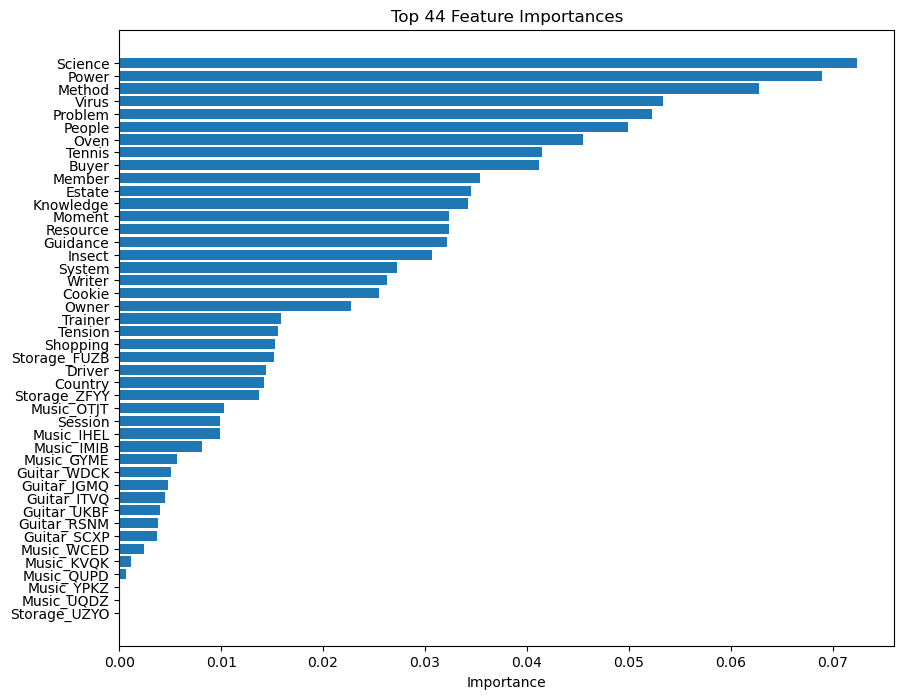

In [67]:
# Plotting the feature importance for all features with original names
plot_feature_importances(feature_importances, feature_names, num_features=len(feature_importances))

In [68]:
# Selects the top N features based on feature importances and prints the selected features.

def select_top_n_features(X_train, X_test, feature_importances, feature_names, n):
    
    # Getting the top N feature indices
    sorted_indices = np.argsort(feature_importances)[::-1]
    top_n_indices = sorted_indices[:n]
    
    # Printing the selected feature names
    selected_features = feature_names[top_n_indices]
    print(f"Top {n} selected features:")
    for feature in selected_features:
        print(feature)
    
    # Select only the top N features for training and test sets
    X_train_top_n = X_train[:, top_n_indices]
    X_test_top_n = X_test[:, top_n_indices]
    
    return X_train_top_n, X_test_top_n


Top 1 selected features:
Science
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Top 2 selected features:
Science
Power
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Top 3 selected features:
Science
Power
Method
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Top 4 selected features:
Science
Power
Method
Virus
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Top 5 selected features:
Science
Power
Method
Virus
Problem
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Top 6 selected features:
Science
Power
Method
Virus
Problem
People
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Top 7 selected features:
Science
Power
Method
Virus
Problem
People
Oven
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Top 8 selected features:
Science
Power
Method
Virus
Problem
People
Oven
Tennis
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Top 9 selected features:
Science
Power
Method
Virus
Problem
Peop

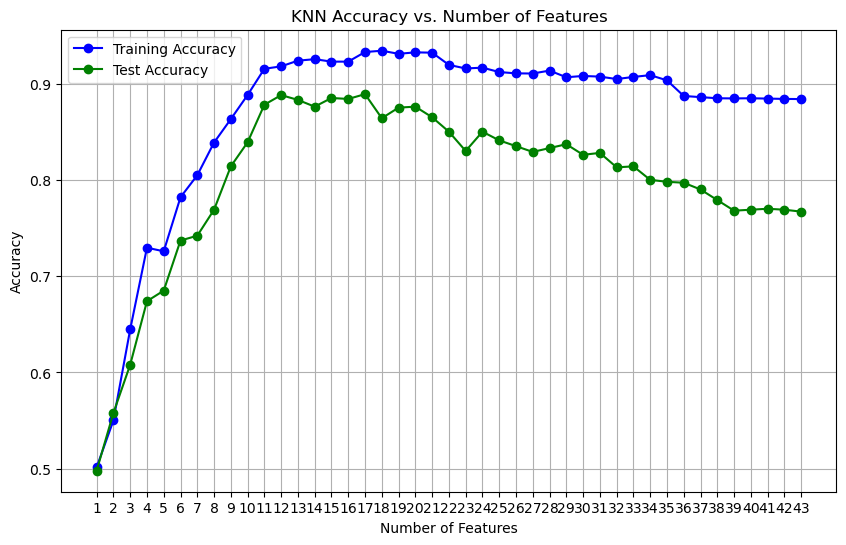

In [69]:
# Using a KNN classifier to check how does the classifier behave with increasing features
# This will help us to identify how many should we use

# Define a range of feature counts to test. We will use all features
n_features_range = range(1, 44)

train_accuracies = []
test_accuracies = []

# Iterate over the range of feature counts
for n_features_to_select in n_features_range:
    # Select top N features for both train and test sets
    X_train_top_n, X_test_top_n = select_top_n_features(X_train_scaled, X_test_scaled, feature_importances, feature_names, n_features_to_select)

    # Initialize the KNN model
    knn = KNeighborsClassifier()

    # Define the hyperparameter grid
    param_grid_knn = {
        'n_neighbors': range(10, 51, 5),
        'weights': ['uniform'],
        'metric': ['euclidean', 'manhattan']
    }

    # Perform grid search with cross-validation
    grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, n_jobs=-1, verbose=1, return_train_score=True)
    grid_search_knn.fit(X_train_top_n, y_train_resampled)

    # Get the best KNN model from the grid search
    best_knn_feature_plotting = grid_search_knn.best_estimator_

    # Evaluate the model on the training and test sets
    train_accuracy_knn = best_knn_feature_plotting.score(X_train_top_n, y_train_resampled)
    test_accuracy_knn = best_knn_feature_plotting.score(X_test_top_n, y_test)

    # Store the accuracies
    train_accuracies.append(train_accuracy_knn)
    test_accuracies.append(test_accuracy_knn)

# Plot the accuracy curves
plt.figure(figsize=(10, 6))
plt.plot(n_features_range, train_accuracies, label='Training Accuracy', marker='o', linestyle='-', color='blue')
plt.plot(n_features_range, test_accuracies, label='Test Accuracy', marker='o', linestyle='-', color='green')

plt.title('KNN Accuracy vs. Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.xticks(n_features_range)
plt.show()


It appears that when we select the top 12 features, we get the maximum test accuracy with minimal distance from the train accuracy. There is a big jump in test accuracy from 10 to 11. However, there is also a small jump from 11 to 12, while the train accuracy only increases slightly.

In [70]:
# Select top 12 features based on importance and print the selected features
n_features_to_select = 12
X_train_top_n, X_test_top_n = select_top_n_features(X_train_scaled, X_test_scaled, feature_importances, feature_names, n_features_to_select)

# Now X_train_top_n and X_test_top_n contain only the top 12 features


Top 12 selected features:
Science
Power
Method
Virus
Problem
People
Oven
Tennis
Buyer
Member
Estate
Knowledge


### Model training and comparison

#### 1. KNN

In [71]:
# Define the KNN parameter grid
param_grid_knn = {
    'n_neighbors': range(10, 51, 1),
    'weights': ['uniform'],
    'metric': ['euclidean', 'manhattan']
}

# Create a KNN model
knn_model = KNeighborsClassifier()

# Define Stratified K-Fold cross-validator
stratified_kfold = StratifiedKFold(n_splits=10)

# Perform grid search with SKF
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=stratified_kfold, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train_top_n, y_train_resampled)

# Get the best model parameters
best_knn_model = grid_search_knn.best_estimator_

# Predict on training and test data
y_train_pred_knn = best_knn_model.predict(X_train_top_n)
y_test_pred_knn = best_knn_model.predict(X_test_top_n)

# Evaluate performance
print("KNN Training Accuracy:", accuracy_score(y_train_resampled, y_train_pred_knn))
print("KNN Test Accuracy:", accuracy_score(y_test, y_test_pred_knn))
print("\nKNN Classification Report on Test Data:\n", classification_report(y_test, y_test_pred_knn))
print("\nKNN Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_knn))

# Output the chosen hyperparameters
print("Best hyperparameters for KNN:", grid_search_knn.best_params_)


KNN Training Accuracy: 0.9244421906693712
KNN Test Accuracy: 0.89

KNN Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.59      0.89      0.71       103
           1       0.93      0.88      0.90       404
           2       0.96      0.90      0.93       493

    accuracy                           0.89      1000
   macro avg       0.83      0.89      0.85      1000
weighted avg       0.91      0.89      0.90      1000


KNN Confusion Matrix:
 [[ 92   4   7]
 [ 35 356  13]
 [ 28  23 442]]
Best hyperparameters for KNN: {'metric': 'euclidean', 'n_neighbors': 12, 'weights': 'uniform'}


#### 2. Naive Bayes

In [72]:
# Create a Naive Bayes model
nb_model = GaussianNB()

# Train the Naive Bayes model
nb_model.fit(X_train_top_n, y_train_resampled)

# Predict on training and test data
y_train_pred_nb = nb_model.predict(X_train_top_n)
y_test_pred_nb = nb_model.predict(X_test_top_n)

# Evaluate performance
print("Naive Bayes Training Accuracy:", accuracy_score(y_train_resampled, y_train_pred_nb))
print("Naive Bayes Test Accuracy:", accuracy_score(y_test, y_test_pred_nb))
print("\nNaive Bayes Classification Report on Test Data:\n", classification_report(y_test, y_test_pred_nb))
print("\nNaive Bayes Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_nb))


Naive Bayes Training Accuracy: 0.6759634888438134
Naive Bayes Test Accuracy: 0.648

Naive Bayes Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.27      0.65      0.38       103
           1       0.72      0.58      0.64       404
           2       0.82      0.70      0.76       493

    accuracy                           0.65      1000
   macro avg       0.60      0.64      0.59      1000
weighted avg       0.72      0.65      0.67      1000


Naive Bayes Confusion Matrix:
 [[ 67  19  17]
 [111 234  59]
 [ 72  74 347]]


#### 3. Decision Tree

In [73]:
# Define the Decision Tree parameter grid
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 12, 14],
    'min_samples_split': [10, 20],
    'min_samples_leaf': [5, 6],
    'class_weight': [None, {0: 1.2, 1: 1, 2: 1}]
}

# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

stratified_kfold = StratifiedKFold(n_splits=10)

# Perform grid search with SKF
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=stratified_kfold, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train_top_n, y_train_resampled)

# Get the best model parameters
best_dt_model = grid_search_dt.best_estimator_

# Predict on training and test data
y_train_pred_dt = best_dt_model.predict(X_train_top_n)
y_test_pred_dt = best_dt_model.predict(X_test_top_n)

# Evaluate performance
print("Decision Tree Training Accuracy:", accuracy_score(y_train_resampled, y_train_pred_dt))
print("Decision Tree Test Accuracy:", accuracy_score(y_test, y_test_pred_dt))
print("\nDecision Tree Classification Report on Test Data:\n", classification_report(y_test, y_test_pred_dt))
print("\nDecision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_dt))

# Output the chosen hyperparameters
print("Best hyperparameters for Decision Tree:", grid_search_dt.best_params_)


Decision Tree Training Accuracy: 0.9264705882352942
Decision Tree Test Accuracy: 0.73

Decision Tree Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.39      0.60      0.47       103
           1       0.74      0.75      0.75       404
           2       0.85      0.74      0.79       493

    accuracy                           0.73      1000
   macro avg       0.66      0.70      0.67      1000
weighted avg       0.76      0.73      0.74      1000


Decision Tree Confusion Matrix:
 [[ 62  20  21]
 [ 56 302  46]
 [ 43  84 366]]
Best hyperparameters for Decision Tree: {'class_weight': {0: 1.2, 1: 1, 2: 1}, 'criterion': 'entropy', 'max_depth': 14, 'min_samples_leaf': 5, 'min_samples_split': 10}


#### 4. Random Forest

In [74]:
# Define the Random Forest parameter grid
param_grid_rf = {
    'n_estimators': [700, 800],
    'criterion': ['gini'],
    'max_depth': [13, 14],
    'min_samples_split': [20],
    'min_samples_leaf': [5, 6],
    'class_weight': [{0: 1.2, 1: 1, 2: 1}]
}

# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42)

stratified_kfold = StratifiedKFold(n_splits=10)

# Perform grid search with SKF
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=stratified_kfold, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train_top_n, y_train_resampled)

# Get the best model parameters
best_rf_model = grid_search_rf.best_estimator_

# Predict on training and test data
y_train_pred_rf = best_rf_model.predict(X_train_top_n)
y_test_pred_rf = best_rf_model.predict(X_test_top_n)

# Evaluate performance
print("Random Forest Training Accuracy:", accuracy_score(y_train_resampled, y_train_pred_rf))
print("Random Forest Test Accuracy:", accuracy_score(y_test, y_test_pred_rf))
print("\nRandom Forest Classification Report on Test Data:\n", classification_report(y_test, y_test_pred_rf))
print("\nRandom Forest Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_rf))

# Output the chosen hyperparameters
print("Best hyperparameters for Random Forest:", grid_search_rf.best_params_)


Random Forest Training Accuracy: 0.9503042596348884
Random Forest Test Accuracy: 0.85

Random Forest Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.58      0.75      0.66       103
           1       0.89      0.84      0.86       404
           2       0.89      0.88      0.89       493

    accuracy                           0.85      1000
   macro avg       0.79      0.82      0.80      1000
weighted avg       0.86      0.85      0.85      1000


Random Forest Confusion Matrix:
 [[ 77  11  15]
 [ 29 339  36]
 [ 26  33 434]]
Best hyperparameters for Random Forest: {'class_weight': {0: 1.2, 1: 1, 2: 1}, 'criterion': 'gini', 'max_depth': 14, 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 700}


#### 5. MLP Neural Network

In [75]:
# Define the MLP parameter grid
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (30, 30), (30, 15), (50, 25)],
    'activation': ['tanh', 'relu', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
    'momentum': [0.9, 0.95],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.001, 0.0005, 0.0001]
}

# Create an MLP model with early stopping
mlp_model = MLPClassifier(max_iter=1500, random_state=42, early_stopping=True)

stratified_kfold = StratifiedKFold(n_splits=5)

# Perform grid search with SKF
grid_search_mlp = GridSearchCV(mlp_model, param_grid_mlp, cv=stratified_kfold, scoring='accuracy', n_jobs=-1)
grid_search_mlp.fit(X_train_top_n, y_train_resampled)

# Get the best model parameters
best_mlp_model = grid_search_mlp.best_estimator_

# Predict on training and test data
y_train_pred_mlp = best_mlp_model.predict(X_train_top_n)
y_test_pred_mlp = best_mlp_model.predict(X_test_top_n)

# Evaluate performance
print("MLP Training Accuracy:", accuracy_score(y_train_resampled, y_train_pred_mlp))
print("MLP Test Accuracy:", accuracy_score(y_test, y_test_pred_mlp))
print("\nMLP Classification Report on Test Data:\n", classification_report(y_test, y_test_pred_mlp))
print("\nMLP Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_mlp))

# Output the chosen hyperparameters
print("Best hyperparameters for MLP:", grid_search_mlp.best_params_)


MLP Training Accuracy: 0.9582488167680866
MLP Test Accuracy: 0.904

MLP Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.70      0.85      0.77       103
           1       0.94      0.89      0.92       404
           2       0.93      0.92      0.93       493

    accuracy                           0.90      1000
   macro avg       0.86      0.89      0.87      1000
weighted avg       0.91      0.90      0.91      1000


MLP Confusion Matrix:
 [[ 88   6   9]
 [ 17 360  27]
 [ 21  16 456]]
Best hyperparameters for MLP: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'momentum': 0.9, 'solver': 'adam'}


#### 6. SVM

In [76]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Defining the SVM parameter grid
param_grid_svm = {
    'C': [0.1, 1, 10, 100],  
    'kernel': ['linear', 'rbf'],  
    'gamma': ['scale', 'auto']  
}

# Creating an SVM model
svm_model = SVC(probability=True, random_state=42)

# Defining Stratified K-Fold cross-validator
stratified_kfold = StratifiedKFold(n_splits=10)

# Performing grid search with SKF
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=stratified_kfold, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_train_top_n, y_train_resampled)

# Get the best model parameters
best_svm_model = grid_search_svm.best_estimator_

# Predict on training and test data
y_train_pred_svm = best_svm_model.predict(X_train_top_n)
y_test_pred_svm = best_svm_model.predict(X_test_top_n)

# Evaluate performance
print("SVM Training Accuracy:", accuracy_score(y_train_resampled, y_train_pred_svm))
print("SVM Test Accuracy:", accuracy_score(y_test, y_test_pred_svm))
print("\nSVM Classification Report on Test Data:\n", classification_report(y_test, y_test_pred_svm))
print("\nSVM Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_svm))

# Output the chosen hyperparameters
print("Best hyperparameters for SVM:", grid_search_svm.best_params_)


SVM Training Accuracy: 0.9714334009465855
SVM Test Accuracy: 0.909

SVM Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.69      0.80      0.74       103
           1       0.93      0.90      0.92       404
           2       0.94      0.94      0.94       493

    accuracy                           0.91      1000
   macro avg       0.86      0.88      0.87      1000
weighted avg       0.91      0.91      0.91      1000


SVM Confusion Matrix:
 [[ 82  10  11]
 [ 23 364  17]
 [ 14  16 463]]
Best hyperparameters for SVM: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


### Model Comparison

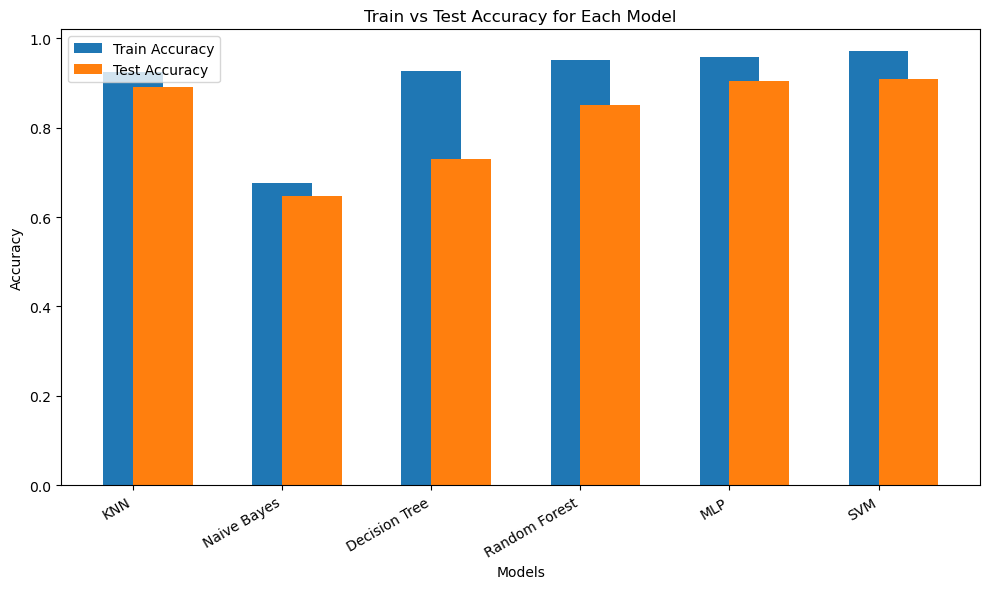

In [77]:
models = ['KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'MLP', 'SVM']
train_accuracies = [
    accuracy_score(y_train_resampled, y_train_pred_knn),
    accuracy_score(y_train_resampled, y_train_pred_nb),
    accuracy_score(y_train_resampled, y_train_pred_dt),
    accuracy_score(y_train_resampled, y_train_pred_rf),
    accuracy_score(y_train_resampled, y_train_pred_mlp),
    accuracy_score(y_train_resampled, y_train_pred_svm)  
]
test_accuracies = [
    accuracy_score(y_test, y_test_pred_knn),
    accuracy_score(y_test, y_test_pred_nb),
    accuracy_score(y_test, y_test_pred_dt),
    accuracy_score(y_test, y_test_pred_rf),
    accuracy_score(y_test, y_test_pred_mlp),
    accuracy_score(y_test, y_test_pred_svm)  
]

# Plot train vs test accuracies for each model
x = range(len(models))

plt.figure(figsize=(10, 6))  
plt.bar(x, train_accuracies, width=0.4, label='Train Accuracy', align='center')
plt.bar(x, test_accuracies, width=0.4, label='Test Accuracy', align='edge')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(x, models, rotation=30, ha='right')  
plt.legend()
plt.title('Train vs Test Accuracy for Each Model')
plt.tight_layout()  
plt.show()

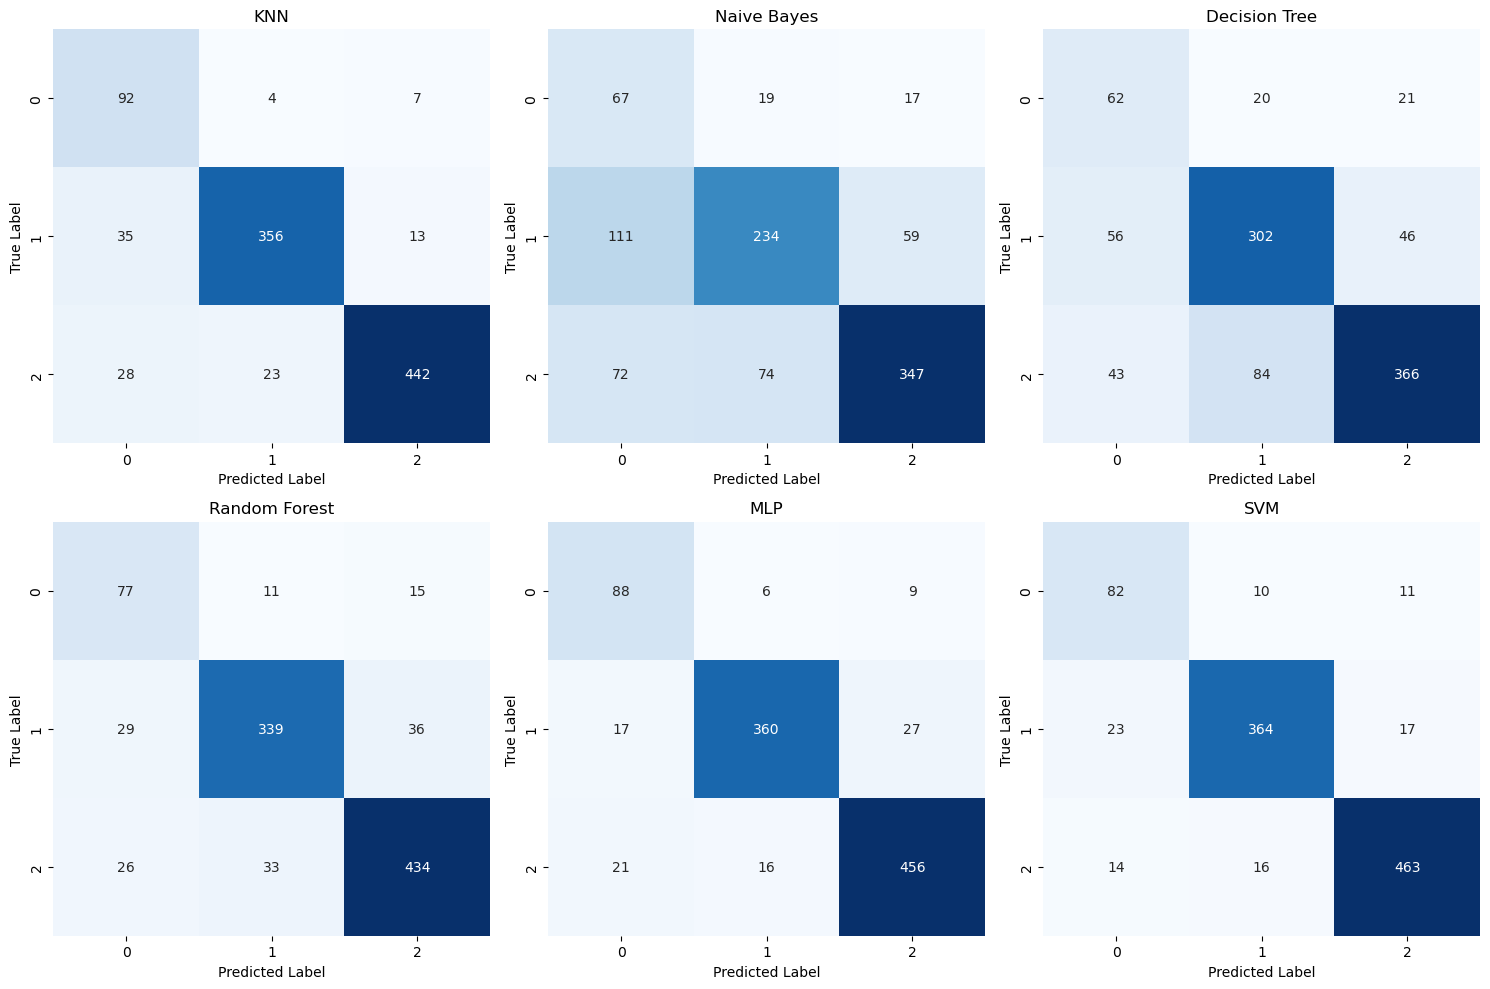

In [78]:
models = ['KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'MLP', 'SVM']
y_preds = [y_test_pred_knn, y_test_pred_nb, y_test_pred_dt, y_test_pred_rf, y_test_pred_mlp, y_test_pred_svm]

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes = axes.flatten()

for i, y_pred in enumerate(y_preds):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i], cbar=False)
    axes[i].set_title(models[i])
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

plt.tight_layout() 
plt.show()


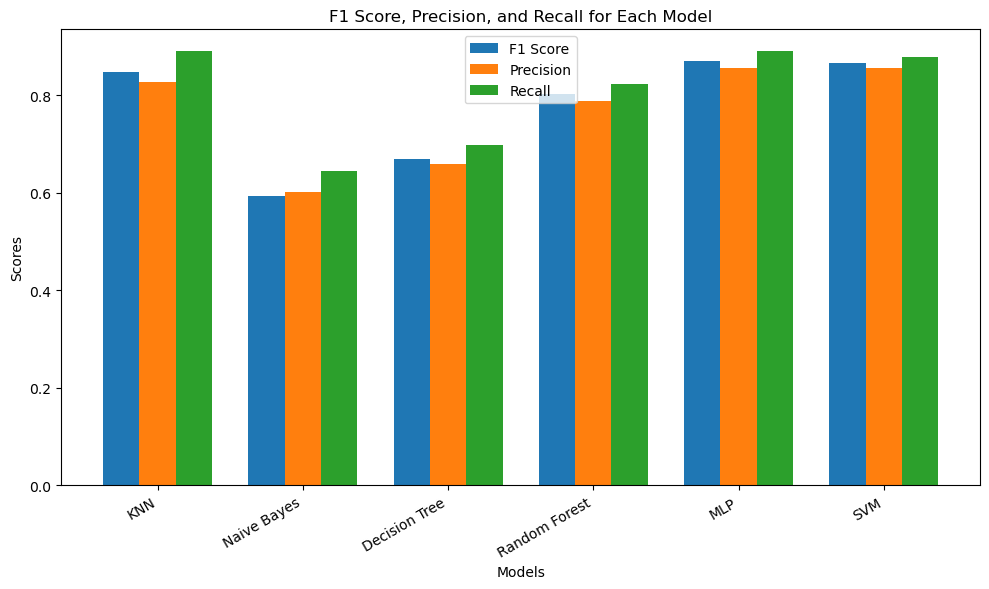

In [79]:
models = ['KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'MLP', 'SVM']

knn_report = classification_report(y_test, y_test_pred_knn, output_dict=True)
nb_report = classification_report(y_test, y_test_pred_nb, output_dict=True)
dt_report = classification_report(y_test, y_test_pred_dt, output_dict=True)
rf_report = classification_report(y_test, y_test_pred_rf, output_dict=True)
mlp_report = classification_report(y_test, y_test_pred_mlp, output_dict=True)
svm_report = classification_report(y_test, y_test_pred_svm, output_dict=True)

f1_scores = [
    knn_report['macro avg']['f1-score'],
    nb_report['macro avg']['f1-score'],
    dt_report['macro avg']['f1-score'],
    rf_report['macro avg']['f1-score'],
    mlp_report['macro avg']['f1-score'],
    svm_report['macro avg']['f1-score']
]

precision_scores = [
    knn_report['macro avg']['precision'],
    nb_report['macro avg']['precision'],
    dt_report['macro avg']['precision'],
    rf_report['macro avg']['precision'],
    mlp_report['macro avg']['precision'],
    svm_report['macro avg']['precision']
]

recall_scores = [
    knn_report['macro avg']['recall'],
    nb_report['macro avg']['recall'],
    dt_report['macro avg']['recall'],
    rf_report['macro avg']['recall'],
    mlp_report['macro avg']['recall'],
    svm_report['macro avg']['recall']
]


x = np.arange(len(models))
width = 0.25

plt.figure(figsize=(10, 6))  
plt.bar(x - width, f1_scores, width, label='F1 Score')
plt.bar(x, precision_scores, width, label='Precision')
plt.bar(x + width, recall_scores, width, label='Recall')

plt.xticks(x, models, rotation=30, ha='right') 
plt.xlabel('Models')
plt.ylabel('Scores')
plt.legend()
plt.title('F1 Score, Precision, and Recall for Each Model')
plt.tight_layout()  
plt.show()


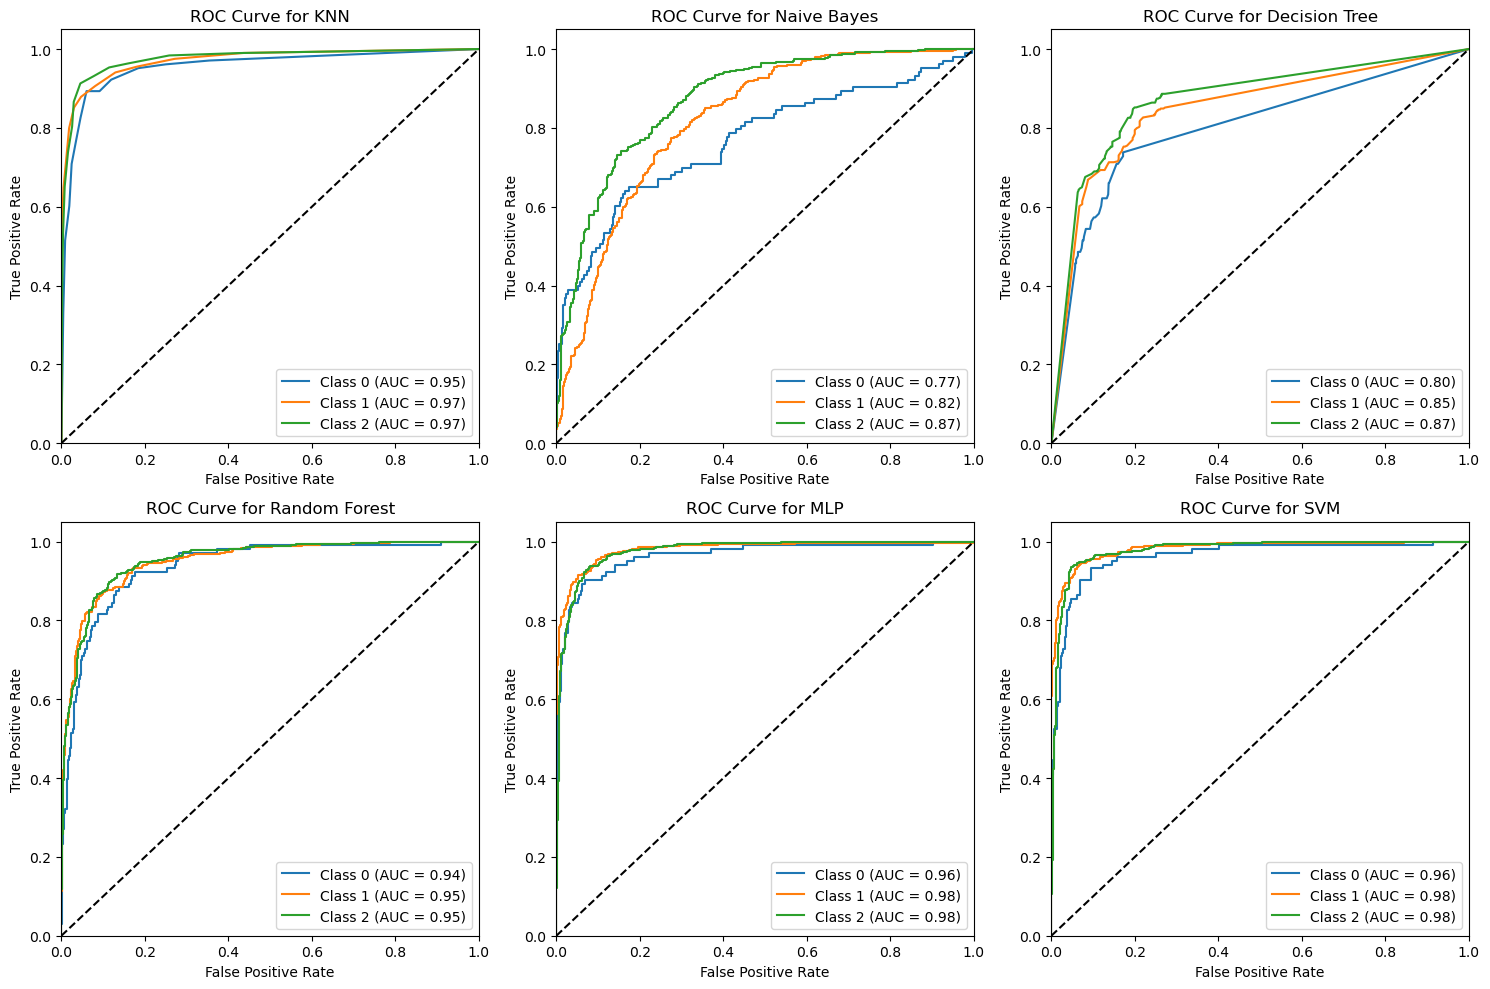

In [80]:
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])  

y_score_knn = best_knn_model.predict_proba(X_test_top_n)
y_score_nb = nb_model.predict_proba(X_test_top_n)
y_score_dt = best_dt_model.predict_proba(X_test_top_n)
y_score_rf = best_rf_model.predict_proba(X_test_top_n)
y_score_mlp = best_mlp_model.predict_proba(X_test_top_n)
y_score_svm = best_svm_model.predict_proba(X_test_top_n)

y_scores = [y_score_knn, y_score_nb, y_score_dt, y_score_rf, y_score_mlp, y_score_svm]
models = ['KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'MLP', 'SVM']

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes = axes.flatten()

for i, y_score in enumerate(y_scores):
    fpr = {}
    tpr = {}
    roc_auc = {}
    
    for j in range(len(y_test_binarized[0])):  
        fpr[j], tpr[j], _ = roc_curve(y_test_binarized[:, j], y_score[:, j])
        roc_auc[j] = auc(fpr[j], tpr[j])

    for j in range(len(y_test_binarized[0])):
        axes[i].plot(fpr[j], tpr[j], label=f'Class {j} (AUC = {roc_auc[j]:.2f})')

    axes[i].plot([0, 1], [0, 1], 'k--')  
    axes[i].set_xlim([0.0, 1.0])
    axes[i].set_ylim([0.0, 1.05])
    axes[i].set_xlabel('False Positive Rate')
    axes[i].set_ylabel('True Positive Rate')
    axes[i].set_title(f'ROC Curve for {models[i]}')
    axes[i].legend(loc="lower right")

plt.tight_layout() 
plt.show()


The best two models are: KNN and Neural Network

### Prediction on Unseen Dataset

In [81]:
# Select the top 12 features from df_unseen_scaled
top_n_indices = np.argsort(feature_importances)[::-1][:n_features_to_select]
df_unseen_top_n = df_unseen_scaled[:, top_n_indices]

# Get the names of the top 12 features
top_n_feature_names = feature_names[top_n_indices]

# Print the top 12 feature names
print("Top 12 features selected from df_unseen:")
for feature in top_n_feature_names:
    print(feature)

# Create a DataFrame for df_unseen_top_n with the top 12 feature names
df_unseen_top_n_df = pd.DataFrame(df_unseen_top_n, columns=top_n_feature_names)

# Display the first few rows of the DataFrame to inspect the values
print("Top 12 features in df_unseen (first 5 rows):")
print(df_unseen_top_n_df.head())


Top 12 features selected from df_unseen:
Science
Power
Method
Virus
Problem
People
Oven
Tennis
Buyer
Member
Estate
Knowledge
Top 12 features in df_unseen (first 5 rows):
    Science     Power    Method     Virus   Problem    People      Oven  \
0  0.003414 -0.875441 -1.082590 -2.760231 -2.760231 -1.587713  0.911300   
1  0.217152  0.860460  0.829419 -0.517150 -0.517150  1.374687 -0.362949   
2  0.673124  0.240819 -0.579602  0.169060  0.169060  0.276918  0.470393   
3 -0.118786  1.668122 -0.657938 -0.936330 -0.936330  1.279485  0.226752   
4  0.920455  1.056268 -1.331427 -0.738275 -0.738275  0.427270  0.813475   

     Tennis     Buyer    Member    Estate  Knowledge  
0 -0.298557 -2.494971  2.487356 -0.229497   0.895896  
1  0.047545 -0.012746  1.437979 -0.537231   1.575761  
2  0.411641  0.081171  0.006926 -0.466442   0.950414  
3  1.474126 -1.105398 -0.584774 -0.934658   1.562332  
4 -0.072332 -0.186551 -0.731325 -1.480111  -0.014464  


In [82]:
# Predict class labels for df_unseen using the finalized KNN and MLP models 

# Predict using the KNN model with the top 12 features
y_unseen_pred_knn = best_knn_model.predict(df_unseen_top_n)

# Predict using the Neural Network model with the top 12 features
y_unseen_pred_mlp = best_mlp_model.predict(df_unseen_top_n)

In [83]:
# Create the output DataFrame with index, KNN predictions, and Neural Network predictions
output_df = pd.DataFrame({
    'index': df_unseen['index'],  
    'KNN': y_unseen_pred_knn,
    'NeuralNetwork': y_unseen_pred_mlp
})

In [ ]:
# Output to Sqlite file
output_cnx = db.connect('Answers.sqlite')

output_df.to_sql('predictions', output_cnx, if_exists='replace', index=False)

output_cnx.close()

print("Predictions for KNN and Neural Network saved to 'Answers.sqlite' successfully!")

Predictions for KNN and Neural Network saved to 'Answers_19434740.sqlite' successfully!


In [85]:
## Taking a look at the output_df
output_df

,index,KNN,NeuralNetwork
0,5000,1,1
1,5001,0,0
2,5002,1,1
3,5003,1,1
4,5004,1,1
...,...,...,...
495,5495,2,2
496,5496,1,1
497,5497,0,2
498,5498,2,2


In [86]:
## Analysing model disagreement

# Filter rows where KNN is not equal to NeuralNetwork
difference_df = output_df[output_df['KNN'] != output_df['NeuralNetwork']]

# Count of differences
count_differences = difference_df.shape[0]

# Total number of rows
total_count = output_df.shape[0]

# Percentage of differences
percentage_difference = (count_differences / total_count) * 100 if total_count > 0 else 0

# Display the results
print("Count of differences:", count_differences)
print("Percentage of differences: {:.2f}%".format(percentage_difference))

Count of differences: 52
Percentage of differences: 10.40%


Therefore, there is a possibility that the classifiers are giving a wrong prediction 10.40% of the time, where as they are correct 89.6%

KNN Accuracy from grid search: 0.89 == 89%
Neural Network Accuracy from grid search: 0.904 == 90.4%